In [11]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:


# Create a DataFrame from the provided data
data = {
    'gender': ['female', 'female', 'female', 'male', 'male'],
    'race/ethnicity': ['group B', 'group C', 'group B', 'group A', 'group C'],
    'parental level of education': ["bachelor's degree", 'some college', 'master\'s degree', "associate's degree", 'some college'],
    'lunch': ['standard', 'standard', 'standard', 'free/reduced', 'standard'],
    'test preparation course': ['none', 'completed', 'none', 'none', 'none'],
    'math score': [72, 69, 90, 45, 76],
    'reading score': [72, 90, 95, 57, 78],
    'writing score': [74, 88, 93, 44, 85]
}

df = pd.DataFrame(data)
print(df)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          45             57             44  
4                    none          76             78             85  


In [13]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'lunch', 'test preparation course']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,1,72,72,74
1,0,group C,some college,1,0,69,90,88
2,0,group B,master's degree,1,1,90,95,93
3,1,group A,associate's degree,0,1,45,57,44
4,1,group C,some college,1,1,76,78,85


In [14]:
# Define feature variables and target
X = df[['gender', 'lunch', 'test preparation course', 'math score', 'reading score']].values
y = df['writing score'].values

In [15]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # Skiped the intercept column for scaling
X_scaled = np.c_[np.ones(X.shape[0]), X_scaled]  # Added intercept term back

# Update X to scaled features
X = X_scaled

In [16]:
# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost


In [17]:
# Define gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history


In [18]:
# Initialize parameters
theta = np.zeros(X.shape[1])
learning_rate = 0.01 
iterations = 2000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Final parameters and cost
print(f"Final theta: {theta}")
print(f"Final cost: {cost_history[-1]}")

Final theta: [76.79999986  6.39645458 -1.67373844  5.49397967  6.04383004]
Final cost: 2.4629404695486143


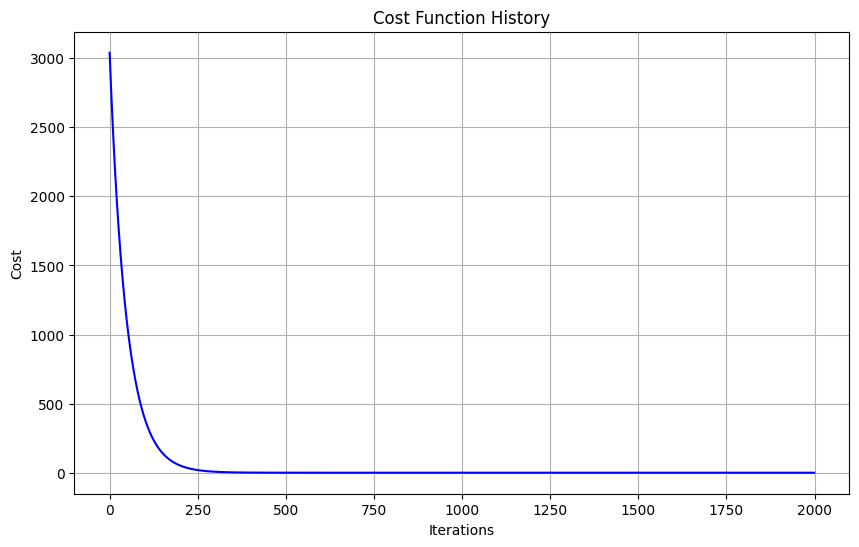

In [19]:
# Plot cost history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

# Predict using the final theta
Y_pred = X.dot(theta)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y, Y_pred))
print(f"RMSE: {rmse}")

# Define R² score function
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Compute and print R² score
r2 = r2_score(y, Y_pred)
print(f"R² score: {r2}")

RMSE: 2.2194325714238827
R² score: 0.9839944081781348
